# importing all the nessecary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#loading the dataset and removing the index_col

data= pd.read_csv(r"C:\Users\user\Downloads\8. Netflix Dataset.csv",index_col=0)

In [3]:
data.head(5)

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
Show_Id,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
data.tail(2)

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
Show_Id,,,,,,,,,,
s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [5]:
data.shape

(7789, 10)

In [6]:
data.size

77890

In [7]:
data.columns

Index(['Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date',
       'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [8]:
data.dtypes

Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7789 entries, s1 to s7787
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Category      7789 non-null   object
 1   Title         7789 non-null   object
 2   Director      5401 non-null   object
 3   Cast          7071 non-null   object
 4   Country       7282 non-null   object
 5   Release_Date  7779 non-null   object
 6   Rating        7782 non-null   object
 7   Duration      7789 non-null   object
 8   Type          7789 non-null   object
 9   Description   7789 non-null   object
dtypes: object(10)
memory usage: 669.4+ KB


In [10]:
#checking duplicates 
data.duplicated().sum()

2

In [11]:
data[data.duplicated()]

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
Show_Id,,,,,,,,,,
s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [12]:
#removing duplicates
data.drop_duplicates(inplace=True)

In [13]:
data.shape

(7787, 10)

In [14]:
#finding the null values

data.isna().sum()

Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

<AxesSubplot:ylabel='Show_Id'>

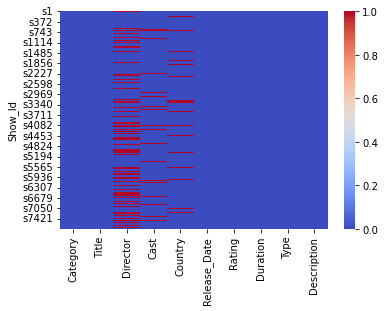

In [15]:
sns.heatmap(data.isna(),cmap='coolwarm')

In [16]:
#removing the null values
df=data.dropna()

In [17]:
df.isna().sum()

Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64

In [18]:
types=df.groupby("Category").size()
types

Category
Movie      4673
TV Show     136
dtype: int64

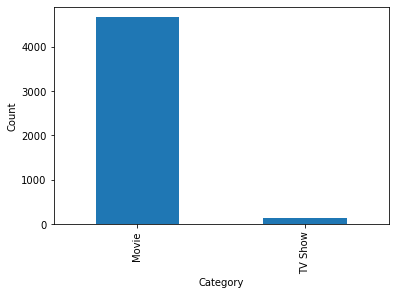

In [19]:
types.plot(kind='bar')

# set the labels for the x-axis and y-axis
plt.xlabel('Category')
plt.ylabel('Count')

# display the plot
plt.show()

# In which year most numbers of Tv Shows and movies released


In [20]:
df.dtypes

Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

There is only release_date column in object(type), will create a new column in datetime which will help me to get the data 

In [21]:
df['Date']= pd.to_datetime(df['Release_Date'])
df

C:\Users\user\AppData\Local\Temp\ipykernel_9524\2835585360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']= pd.to_datetime(df['Release_Date'])


,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date
Show_Id,,,,,,,,,,,
s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01
s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017-07-01
...,...,...,...,...,...,...,...,...,...,...,...
s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01
s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,2018-07-01
s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11


In [22]:
df.dtypes

Category                object
Title                   object
Director                object
Cast                    object
Country                 object
Release_Date            object
Rating                  object
Duration                object
Type                    object
Description             object
Date            datetime64[ns]
dtype: object

In [23]:
df['Date'].dt.year.value_counts()

2019    1337
2020    1229
2018    1115
2017     752
2016     207
2021      78
2015      50
2014      14
2011      13
2013       7
2012       3
2009       2
2010       1
2008       1
Name: Date, dtype: int64

<AxesSubplot:>

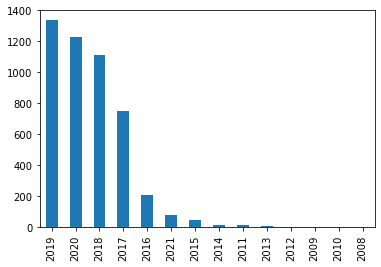

In [24]:
df['Date'].dt.year.value_counts().plot(kind='bar')

In [25]:
# create a new column with the year extracted from the 'date' column
df['Year']=df['Date'].dt.year
df.head(2)

C:\Users\user\AppData\Local\Temp\ipykernel_9524\3533589469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year']=df['Date'].dt.year


,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Year
Show_Id,,,,,,,,,,,,
s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018


In [26]:
# In 2021 how many movies and tv shows were released 

df[(df['Category']=='Movie')&(df['Year']==2021)]

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Year
Show_Id,,,,,,,,,,,,
s58,Movie,100% Halal,Jastis Arimba,"Anisa Rahma, Ariyo Wahab, Anandito Dwis, Fitri...",Indonesia,"January 7, 2021",TV-14,101 min,"Dramas, International Movies","After high school, a young woman marries the m...",2021-01-07,2021
s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021-01-01,2021
s105,Movie,30 Minutes or Less,Ruben Fleischer,"Jesse Eisenberg, Danny McBride, Aziz Ansari, N...",United States,"January 1, 2021",R,83 min,"Action & Adventure, Comedies",Two crooks planning a bank heist wind up abduc...,2021-01-01,2021
s206,Movie,A Monster Calls,J.A. Bayona,"Lewis MacDougall, Sigourney Weaver, Felicity J...","United Kingdom, Spain, United States","January 16, 2021",PG-13,108 min,"Dramas, Sci-Fi & Fantasy","Overwhelmed by his mother’s illness, a young b...",2021-01-16,2021
s494,Movie,An Imperfect Murder,James Toback,"Sienna Miller, Alec Baldwin, Charles Grodin, C...",United States,"January 13, 2021",R,71 min,"Dramas, Thrillers",Haunted by a nightmare involving her abusive e...,2021-01-13,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
s7146,Movie,Tony Parker: The Final Shot,Florent Bodin,Tony Parker,France,"January 6, 2021",TV-14,99 min,"Documentaries, International Movies, Sports Mo...",This film examines the background and career o...,2021-01-06,2021
s7352,Movie,Unknown,Jaume Collet-Serra,"Liam Neeson, Diane Kruger, January Jones, Aida...","United Kingdom, Germany, France, United States","January 1, 2021",PG-13,113 min,"Action & Adventure, Thrillers",Liam Neeson stars as a man who regains conscio...,2021-01-01,2021
s7552,Movie,What Happened to Mr. Cha?,Kim Dong-kyu,"Cha In-pyo, Cho Dal-hwan, Song Jae-ryong",South Korea,"January 1, 2021",TV-MA,102 min,"Comedies, International Movies","With the peak of his career long behind him, a...",2021-01-01,2021


In [27]:
df[(df['Category']=='TV Show')&(df['Year']==2021)]

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Year
Show_Id,,,,,,,,,,,,
s3545,TV Show,Last Tango in Halifax,Juliet May,"Derek Jacobi, Anne Reid, Sarah Lancashire, Nic...",United Kingdom,"January 12, 2021",TV-MA,4 Seasons,"British TV Shows, Romantic TV Shows, TV Dramas",Two widowed childhood sweethearts fall for eac...,2021-01-12,2021
s6204,TV Show,The Cat in the Hat Knows a Lot About That!,Tony Collingwood,"Martin Short, Alexa Torrington, Jacob Ewaniuk,...","Canada, United Kingdom, United States","January 1, 2021",TV-Y,1 Season,Kids' TV,"The Cat in the Hat is back – and this time, he...",2021-01-01,2021
s6478,TV Show,The Idhun Chronicles,Maite Ruiz De Austri,"Michelle Jenner, Itzan Escamilla, Sergio Mur, ...",Spain,"January 8, 2021",TV-14,2 Seasons,"Anime Series, International TV Shows, Spanish-...",A boy suddenly orphaned fights his parents' ki...,2021-01-08,2021


In [28]:
#fetching from the data numbers of tv shows and movies released in india

In [29]:
df[(df['Category']=='TV Show') & (df['Country']=='India')]['Title']

Show_Id
s133                                 7 (Seven)
s2407                                    GHOUL
s3120             Jamtara - Sabka Number Ayega
s4725                          Paava Kadhaigal
s6037    Th Eena Meena Deeka Chase Comedy Show
Name: Title, dtype: object

In [30]:
df[(df['Category']=='Movie') & (df['Country']=='India')]['Title']

Show_Id
s9                            706
s10                          1920
s19                        15-Aug
s21          ​​Kuch Bheege Alfaaz
s22                  ​Goli Soda 2
                   ...           
s7765                        Zero
s7770    Zindagi Na Milegi Dobara
s7777                    Zokkomon
s7781                         Zoo
s7784                      Zubaan
Name: Title, Length: 827, dtype: object

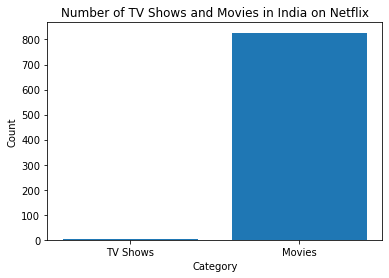

In [31]:
tv_shows_india = df[(df['Category']=='TV Show') & (df['Country']=='India')]['Title'].count()
movies_india = df[(df['Category']=='Movie') & (df['Country']=='India')]['Title'].count()
plt.bar(['TV Shows', 'Movies'], [tv_shows_india, movies_india])
plt.title('Number of TV Shows and Movies in India on Netflix')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [32]:
#top 5 directors who have highest number of movies and tv shows
df['Director'].value_counts().head()

Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Name: Director, dtype: int64

# Types of movies are in Netflix

In [33]:
movies_types=df.groupby("Type").size()
movies_types

Type
Action & Adventure                                              97
Action & Adventure, Anime Features, Children & Family Movies     3
Action & Adventure, Anime Features, Classic Movies               1
Action & Adventure, Anime Features, Horror Movies                1
Action & Adventure, Anime Features, International Movies        27
                                                                ..
TV Comedies, TV Dramas                                           1
TV Dramas, TV Thrillers                                          1
TV Horror, TV Mysteries, TV Thrillers                            1
TV Shows                                                         4
Thrillers                                                       49
Length: 324, dtype: int64

# How many movies star cast was Tom Cruise?

In [34]:
df[df['Cast'].str.contains('Tom Cruise')]

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Year
Show_Id,,,,,,,,,,,,
s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020-01-01,2020
s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019-07-01,2019


# Different types of ratings

In [35]:
df['Rating'].nunique()

14

In [36]:
df['Rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-G', 'TV-PG', 'NR', 'PG', 'G',
       'TV-Y7', 'TV-Y', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

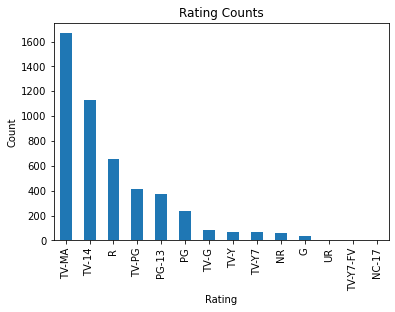

In [37]:
# Count the occurrences of each unique value in the 'Rating' column
rating_counts = df['Rating'].value_counts()

# Create a bar plot of the ratings and their counts
rating_counts.plot.bar()

# Add labels and a title to the plot
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Counts')

# Show the plot
plt.show()


# How many movies get TV- MA ratings

In [38]:
df[(df['Category']=='Movie') & (df['Rating']== 'TV-MA')].shape

(1594, 12)

In [39]:
df[(df['Category']=='Movie') & (df['Rating']== 'TV-MA') & (data['Country']== 'India')]

C:\Users\user\AppData\Local\Temp\ipykernel_9524\468931989.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[(df['Category']=='Movie') & (df['Rating']== 'TV-MA') & (data['Country']== 'India')]


,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Year
Show_Id,,,,,,,,,,,,
s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,2017-12-15,2017
s130,Movie,6-5=2,Bharat Jain,"Prashantt Guptha, Gaurav Paswala, Gaurav Kotha...",India,"November 1, 2017",TV-MA,103 min,"Horror Movies, International Movies, Thrillers",Six friends decide to undertake a grueling mou...,2017-11-01,2017
s137,Movie,7 Khoon Maaf,Vishal Bhardwaj,"Priyanka Chopra, Neil Nitin Mukesh, John Abrah...",India,"August 2, 2018",TV-MA,148 min,"Dramas, International Movies, Thrillers","Spiced liberally with black comedy, this Bolly...",2018-08-02,2018
s144,Movie,90 ML,Anita Udeep,"Oviya, Masoom Shankar, Bommu Lakshmi, Monisha ...",India,"August 13, 2019",TV-MA,123 min,"Comedies, International Movies, Music & Musicals",Four friends shake up their lives when they me...,2019-08-13,2019
s222,Movie,A Scandall,Ishaan Trivedi,"Johnny Baweja, Reeth Mazumder, Manav Kaul, Tan...",India,"October 15, 2017",TV-MA,108 min,"International Movies, Thrillers",A film school graduate is interested in making...,2017-10-15,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
s7692,Movie,Y.M.I.: Yeh Mera India,N. Chandra,"Anupam Kher, Atul Kulkarni, Aakash Pandey, Mil...",India,"March 1, 2018",TV-MA,137 min,"Dramas, Independent Movies, International Movies","The lives of a middle-aged soap opera addict, ...",2018-03-01,2018
s7702,Movie,Yeh Ballet,Sooni Taraporevala,"Julian Sands, Manish Chauhan, Achintya Bose, J...",India,"February 21, 2020",TV-MA,117 min,"Dramas, International Movies","Discovered by an eccentric ballet master, two ...",2020-02-21,2020
s7745,Movie,"Yours Sincerely, Kanan Gill",Neville Shah,Kanan Gill,India,"April 24, 2020",TV-MA,72 min,Stand-Up Comedy,Revisiting life goals set in a letter written ...,2020-04-24,2020


# Minimum and Maximum Durations movie/tv show  on Netflix

In [40]:
df['Duration'].unique()

array(['93 min', '78 min', '80 min', '123 min', '1 Season', '95 min',
       '119 min', '118 min', '143 min', '103 min', '89 min', '91 min',
       '149 min', '144 min', '124 min', '110 min', '128 min', '117 min',
       '100 min', '99 min', '102 min', '104 min', '105 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '87 min', '109 min',
       '101 min', '90 min', '113 min', '114 min', '130 min', '94 min',
       '140 min', '135 min', '82 min', '70 min', '92 min', '164 min',
       '83 min', '116 min', '84 min', '86 min', '120 min', '96 min',
       '126 min', '75 min', '129 min', '77 min', '137 min', '148 min',
       '121 min', '122 min', '176 min', '85 min', '22 min', '68 min',
       '111 min', '29 min', '142 min', '168 min', '59 min', '108 min',
       '44 min', '26 min', '156 min', '98 min', '57 min', '150 min',
       '133 min', '115 min', '154 min', '127 min', '146 min', '136 min',
       '88 min', '131 min', '2 Seasons', '24 min', '112 min', '74 min',
       '

Converting Seasons into to min, it will help in to get accurate data

In [41]:
def convert_to_minutes(duration):
    if 'Seasons' in duration:
        num_seasons = int(duration.split()[0])
        return num_seasons * 480
    else:
        return int(duration.split()[0])

# Apply the function to the 'Duration' column
df['Duration_minutes'] = df['Duration'].apply(convert_to_minutes)

C:\Users\user\AppData\Local\Temp\ipykernel_9524\3694107967.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration_minutes'] = df['Duration'].apply(convert_to_minutes)


In [42]:
df['Duration_minutes'].unique()

array([  93,   78,   80,  123,    1,   95,  119,  118,  143,  103,   89,
         91,  149,  144,  124,  110,  128,  117,  100,   99,  102,  104,
        105,  125,   81,   97,  106,  107,   87,  109,  101,   90,  113,
        114,  130,   94,  140,  135,   82,   70,   92,  164,   83,  116,
         84,   86,  120,   96,  126,   75,  129,   77,  137,  148,  121,
        122,  176,   85,   22,   68,  111,   29,  142,  168,   59,  108,
         44,   26,  156,   98,   57,  150,  133,  115,  154,  127,  146,
        136,   88,  131,  960,   24,  112,   74,   63,  174,   60,  153,
        158,  151,  162,   54,   51,   69,   64,  147,   42,   79,   45,
        172,   53,  163,   55,   61,   71,  160,  171,   30,   48,  139,
        157,   15,   72,  134,  161,   62, 3840,  186,   49,   73,   58,
         65,  165,  159,  141,  132,  166,   76,   25,   56,  138,   67,
         28,   66,  180,   47,  155,   14,  177, 4320,   46,  145, 2880,
          8,   12,   52, 2400,   43, 1920,  185,  2

In [43]:
df.head()

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Year,Duration_minutes
Show_Id,,,,,,,,,,,,,
s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016,93
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018,78
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017,80
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020,123
s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017-07-01,2017,1


In [44]:
df['Duration'].max()

'99 min'

In [45]:
df['Duration'].min()

'1 Season'

# Country highest number of tv shows

In [46]:
df.head(2)

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Year,Duration_minutes
Show_Id,,,,,,,,,,,,,
s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016,93
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018,78


In [47]:
data_tvshows = df[df['Category']=='TV Show']
data_tvshows.head(2)

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Year,Duration_minutes
Show_Id,,,,,,,,,,,,,
s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017-07-01,2017,1
s133,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,"July 30, 2019",TV-14,1 Season,TV Shows,Multiple women report their husbands as missin...,2019-07-30,2019,1


In [48]:
data_tvshows['Country'].value_counts()

United States                                                    27
United Kingdom                                                   19
Japan                                                            10
South Korea                                                      10
Spain                                                             7
Taiwan                                                            6
Turkey                                                            5
India                                                             5
Brazil                                                            4
Canada                                                            3
Thailand                                                          3
Nigeria                                                           3
France                                                            3
China                                                             2
Italy                                           

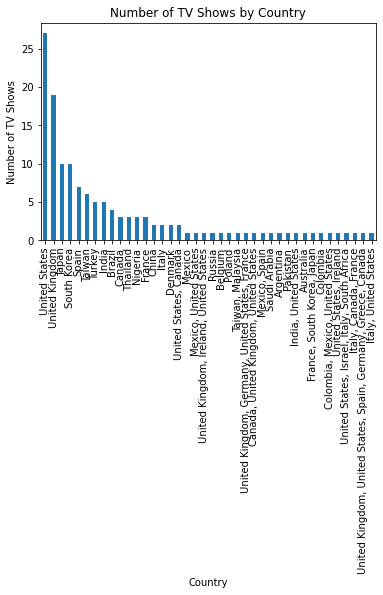

In [49]:
data_tvshows['Country'].value_counts().plot(kind='bar')

# set plot title and axis labels
plt.title('Number of TV Shows by Country')
plt.xlabel('Country')
plt.ylabel('Number of TV Shows')

# show the plot
plt.show()

# Country with highest number of movies

In [50]:
data_movies = df[df['Category']=='Movie']
data_movies.head(2)

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Year,Duration_minutes
Show_Id,,,,,,,,,,,,,
s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016,93
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018,78


In [51]:
data_movies['Country'].value_counts()

United States                                                   1627
India                                                            827
United Kingdom                                                   155
Canada                                                           101
Egypt                                                             87
                                                                ... 
Netherlands, Belgium                                               1
United Kingdom, Denmark, Canada, Croatia                           1
Thailand, United States                                            1
United States, South Korea                                         1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: Country, Length: 536, dtype: int64

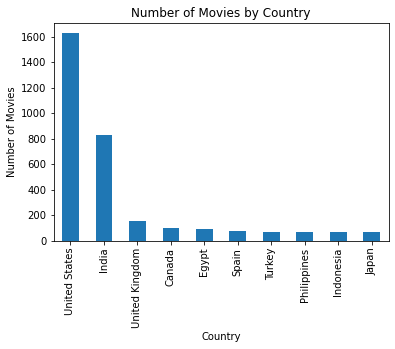

In [53]:
data_movies['Country'].value_counts().iloc[:10].plot(kind='bar')

# set plot title and axis labels
plt.title('Number of Movies by Country')
plt.xlabel('Country')
plt.ylabel('Number of Movies')

# show the plot
plt.show()